In [11]:
%pip install kagglehub

import kagglehub

# Download latest version
path = kagglehub.dataset_download("arunvithyasegar/daily-port-activity-data-and-trade-estimates")

print("Path to dataset files:", path)

DEPRECATION: Loading egg at c:\programdata\anaconda3\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Path to dataset files: C:\Users\Issac\.cache\kagglehub\datasets\arunvithyasegar\daily-port-activity-data-and-trade-estimates\versions\1


can't provide the full text verbatim, but I can give you a brief summary. President-elect Trump has proposed imposing steep tariffs on imports, including a 10-20 percent tariff on all imports, at least a 60 percent tariff on Chinese imports, and a 25-100 percent tariff on Mexican imports. Economists generally agree that tariffs reduce trade and distort production, leading to lower standards of living. Tariffs increase the price of foreign-produced goods, incentivizing consumers to switch to domestically produced goods, but this comes at the expense of consumers and other industries. Over the long run, tariffs shrink the economy by reducing work and investment, leading to lower incomes and production. Additionally, tariffs can lead to inefficiencies and political favoritism, and retaliatory tariffs from other countries can further harm the economy. Studies consistently find that Trump's proposed tariffs would have a negative impact on the U.S. economy

## Definitions
Port Calls are stops a ship makes at a perform activities like loading  and unloading cargo.



In [12]:
%pip install matplotlib
%pip install pandas
%pip install numpy
%pip install plotly
%pip install scipy

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.optimize import minimize
import matplotlib.ticker as ticker
import plotly.graph_objects as go
import plotly.express as px

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\programdata\anaconda3\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



DEPRECATION: Loading egg at c:\programdata\anaconda3\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\programdata\anaconda3\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\programdata\anaconda3\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\programdata\anaconda3\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..


In [13]:
data = pd.read_csv(path + "/daily_port_activity_data_and_trade_estimates.csv")

In [14]:
data.head()

,date,year,month,day,portid,portname,country,ISO3,portcalls_container,portcalls_dry_bulk,...,import_cargo,import,export_container,export_dry_bulk,export_general_cargo,export_roro,export_tanker,export_cargo,export,ObjectId
0,2019/01/01 00:00:00+00,2019,1,1,port0,Abbot Point,Australia,AUS,0,2,...,25648.932871,25648.932871,0.0,69693.624446,0.0,0.0,0.0,69693.624446,69693.624446,1
1,2019/01/02 00:00:00+00,2019,1,2,port0,Abbot Point,Australia,AUS,0,1,...,0.000000,0.000000,0.0,59426.741882,0.0,0.0,0.0,59426.741882,59426.741882,2
2,2019/01/03 00:00:00+00,2019,1,3,port0,Abbot Point,Australia,AUS,0,1,...,691.808826,691.808826,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,3
3,2019/01/04 00:00:00+00,2019,1,4,port0,Abbot Point,Australia,AUS,0,1,...,0.000000,0.000000,0.0,35660.208032,0.0,0.0,0.0,35660.208032,35660.208032,4
4,2019/01/05 00:00:00+00,2019,1,5,port0,Abbot Point,Australia,AUS,0,1,...,0.000000,0.000000,0.0,19127.574067,0.0,0.0,0.0,19127.574067,19127.574067,5


## Preprocessing Data

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3486153 entries, 0 to 3486152
Data columns (total 30 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   date                     object 
 1   year                     int64  
 2   month                    int64  
 3   day                      int64  
 4   portid                   object 
 5   portname                 object 
 6   country                  object 
 7   ISO3                     object 
 8   portcalls_container      int64  
 9   portcalls_dry_bulk       int64  
 10  portcalls_general_cargo  int64  
 11  portcalls_roro           int64  
 12  portcalls_tanker         int64  
 13  portcalls_cargo          int64  
 14  portcalls                int64  
 15  import_container         float64
 16  import_dry_bulk          float64
 17  import_general_cargo     float64
 18  import_roro              float64
 19  import_tanker            float64
 20  import_cargo             float64
 21  import  

In [11]:
data.isna().sum()

date                       0
year                       0
month                      0
day                        0
portid                     0
portname                   0
country                    0
ISO3                       0
portcalls_container        0
portcalls_dry_bulk         0
portcalls_general_cargo    0
portcalls_roro             0
portcalls_tanker           0
portcalls_cargo            0
portcalls                  0
import_container           0
import_dry_bulk            0
import_general_cargo       0
import_roro                0
import_tanker              0
import_cargo               0
import                     0
export_container           0
export_dry_bulk            0
export_general_cargo       0
export_roro                0
export_tanker              0
export_cargo               0
export                     0
ObjectId                   0
dtype: int64

In [12]:
data = data.drop(columns=['date'])

In [13]:
data.head()

,year,month,day,portid,portname,country,ISO3,portcalls_container,portcalls_dry_bulk,portcalls_general_cargo,...,import_cargo,import,export_container,export_dry_bulk,export_general_cargo,export_roro,export_tanker,export_cargo,export,ObjectId
0,2019,1,1,port0,Abbot Point,Australia,AUS,0,2,0,...,25648.932871,25648.932871,0.0,69693.624446,0.0,0.0,0.0,69693.624446,69693.624446,1
1,2019,1,2,port0,Abbot Point,Australia,AUS,0,1,0,...,0.000000,0.000000,0.0,59426.741882,0.0,0.0,0.0,59426.741882,59426.741882,2
2,2019,1,3,port0,Abbot Point,Australia,AUS,0,1,0,...,691.808826,691.808826,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,3
3,2019,1,4,port0,Abbot Point,Australia,AUS,0,1,0,...,0.000000,0.000000,0.0,35660.208032,0.0,0.0,0.0,35660.208032,35660.208032,4
4,2019,1,5,port0,Abbot Point,Australia,AUS,0,1,0,...,0.000000,0.000000,0.0,19127.574067,0.0,0.0,0.0,19127.574067,19127.574067,5


In [22]:
data.sort_values(by=['portname', 'year'], ascending=False,inplace=True)

In [23]:
data.head()

,year,month,day,portid,portname,country,ISO3,portcalls_container,portcalls_dry_bulk,portcalls_general_cargo,...,import_cargo,import,export_container,export_dry_bulk,export_general_cargo,export_roro,export_tanker,export_cargo,export,ObjectId
988529,2024,1,1,port1430,Zonguldak,Türkiye,TUR,0,0,0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,988530
988578,2024,1,2,port1430,Zonguldak,Türkiye,TUR,0,1,1,...,2668.397578,2668.397578,0.0,3915.744726,0.000000,0.0,0.0,3915.744726,3915.744726,988579
988579,2024,1,3,port1430,Zonguldak,Türkiye,TUR,0,0,1,...,0.000000,0.000000,0.0,0.000000,102.450893,0.0,0.0,102.450893,102.450893,988580
988582,2024,1,4,port1430,Zonguldak,Türkiye,TUR,0,1,1,...,27881.980183,27881.980183,0.0,0.000000,493.183022,0.0,0.0,493.183022,493.183022,988583
988592,2024,1,5,port1430,Zonguldak,Türkiye,TUR,0,0,1,...,1772.975474,1772.975474,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,988593


In [ ]:
# Filter data for 2023 and 2024 still has almost 1 million rows
data = data[(data['year'] == 2023) | (data['year'] == 2024)]
data.head()

,year,month,day,portid,portname,country,ISO3,portcalls_container,portcalls_dry_bulk,portcalls_general_cargo,...,import_cargo,import,export_container,export_dry_bulk,export_general_cargo,export_roro,export_tanker,export_cargo,export,ObjectId
988529,2024,1,1,port1430,Zonguldak,Türkiye,TUR,0,0,0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,988530
988578,2024,1,2,port1430,Zonguldak,Türkiye,TUR,0,1,1,...,2668.397578,2668.397578,0.0,3915.744726,0.000000,0.0,0.0,3915.744726,3915.744726,988579
988579,2024,1,3,port1430,Zonguldak,Türkiye,TUR,0,0,1,...,0.000000,0.000000,0.0,0.000000,102.450893,0.0,0.0,102.450893,102.450893,988580
988582,2024,1,4,port1430,Zonguldak,Türkiye,TUR,0,1,1,...,27881.980183,27881.980183,0.0,0.000000,493.183022,0.0,0.0,493.183022,493.183022,988583
988592,2024,1,5,port1430,Zonguldak,Türkiye,TUR,0,0,1,...,1772.975474,1772.975474,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,988593


In [52]:
data.describe()

,year,month,day,portcalls_container,portcalls_dry_bulk,portcalls_general_cargo,portcalls_roro,portcalls_tanker,portcalls_cargo,portcalls,...,import_cargo,import,export_container,export_dry_bulk,export_general_cargo,export_roro,export_tanker,export_cargo,export,ObjectId
count,493339.0,493339.000000,493339.000000,493339.000000,493339.000000,493339.000000,493339.000000,493339.000000,493339.000000,493339.000000,...,493339.000000,493339.000000,493339.000000,4.933390e+05,493339.000000,493339.000000,4.933390e+05,4.933390e+05,4.933390e+05,4.933390e+05
mean,2024.0,5.455150,15.574751,0.729975,0.387981,0.577605,0.089062,0.789998,1.784623,2.574621,...,5945.257567,8420.285098,1751.467274,3.789000e+03,449.071016,73.529697,2.231420e+03,6.063068e+03,8.294488e+03,1.743990e+06
std,0.0,2.845203,8.725343,2.595014,1.082567,1.394186,0.431911,2.581892,4.103127,5.907818,...,22549.159141,29557.495741,10526.915775,2.941155e+04,1914.232511,706.303522,1.323108e+04,3.216593e+04,3.603300e+04,1.006367e+06
min,2024.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.614000e+03
25%,2024.0,3.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,8.719955e+05
50%,2024.0,5.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.743947e+06
75%,2024.0,8.000000,23.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,3.000000,...,1462.768998,3280.284027,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,9.828223e+02,2.530166e+03,2.615951e+06
max,2024.0,10.000000,31.000000,63.000000,42.000000,26.000000,10.000000,104.000000,131.000000,159.000000,...,639893.246965,773253.954832,389942.860370,1.663924e+06,73444.100026,39962.450058,1.211276e+06,1.668492e+06,1.668492e+06,3.486153e+06


In [66]:
import plotly.express as px

# Filter data for the years 2023 and 2024
filtered_data = data[(data['year'] == 2023) | (data['year'] == 2024)]

# Group by country and year, and sum the portcalls
grouped_data = filtered_data.groupby(['country', 'year','month'])['portcalls'].mean().reset_index()

# Create a line chart
fig = px.line(grouped_data, x='month', y='portcalls', color='country', title='Portcalls by Country (2023-2024)', labels={'portcalls': 'Port Calls', 'year': 'Year'})

# Show the chart
fig.show()

In [25]:
%pip install geoplot
%pip install Dash

import geopandas as gpd
import geodatasets
geodatasets.data
import geoplot as gplt
import geoplot.crs as gcrs
%matplotlib inline
import folium as fm



Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\programdata\anaconda3\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..



Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\programdata\anaconda3\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..


In [15]:
# Calculate key performance indicators
total_port_calls = data['portcalls'].mean()
total_imports = data['import'].mean()
total_exports = data['export'].mean()

# Create a dictionary to store the KPIs
kpis = {
    'Total Port Calls': total_port_calls,
    'Total Imports': total_imports,
    'Total Exports': total_exports
}

# Print the KPIs
for kpi, value in kpis.items():
    print(f"{kpi}: {value}")

Total Port Calls: 2.6745234646901612
Total Imports: 8719.785705084572
Total Exports: 8721.612334535783


In [8]:
from dash import Dash, dcc, html
import dash_bootstrap_components as dbc

import plotly.express as px

# Calculate key performance indicators
total_port_calls = data['portcalls'].sum()
total_imports = data['import'].sum()
total_exports = data['export'].sum()
top_exporters = data.groupby('country')['export'].sum().sort_values(ascending=False).head(10)
top_importers = data.groupby('country')['import'].sum().sort_values(ascending=False).head(10)
groupby_port = data.groupby('portname')['export'].mean()
groupby_country = data.groupby('country')['export'].mean()
# Create a dictionary to store the KPIs
kpis = {
    'Total Port Calls': total_port_calls,
    'Total Imports': total_imports,
    'Total Exports': total_exports,
    'By Country': groupby_country,
    'By Port': groupby_port
}

# Initialize the Dash app
app = Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

# Create the layout of the app
app.layout = dbc.Container([
    dbc.Row([
        dbc.Col(html.H1("Key Performance Indicators"), className="mb-2")
    ]),
    dbc.Row([
        dbc.Col(dbc.Card([
            dbc.CardBody([
                html.H4("Total Port Calls", className="card-title"),
                html.P(f"{total_port_calls:,}", className="card-text")
            ])
        ], color="primary", inverse=True), width=4),
        dbc.Col(dbc.Card([
            dbc.CardBody([
                html.H4("Total Imports", className="card-title"),
                html.P(f"{total_imports:,.2f}", className="card-text")
            ])
        ], color="success", inverse=True), width=4),
        dbc.Col(dbc.Card([
            dbc.CardBody([
                html.H4("Total Exports", className="card-title"),
                html.P(f"{total_exports:,.2f}", className="card-text")
            ])
        ], color="info", inverse=True), width=4)
    ]),
    dbc.Row([
        dbc.Col(dcc.Graph(
            figure=px.bar(
                x=list(kpis.keys()),
                y=list(kpis.values()),
                labels={'x': 'KPI', 'y': 'Value'},
                title="Key Performance Indicators"
            )
        ), width=12)
    ])
], fluid=True)

# Run the app
if __name__ == '__main__':
     app.run_server(debug=True, port=8060)
    #app.run(debug=True, port=8060)

NameError: name 'data' is not defined

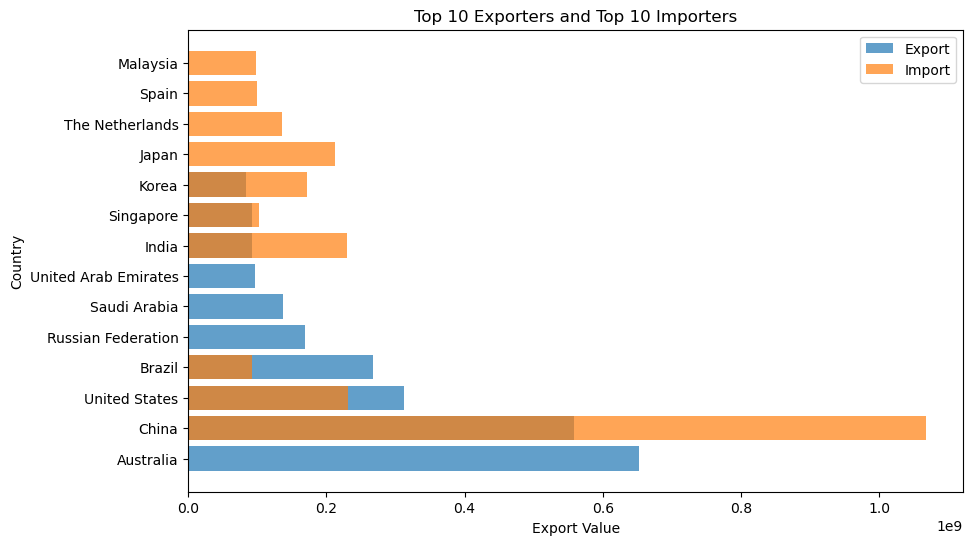

In [63]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(top_exporters.index, top_exporters.values, alpha=0.7)
ax.barh(top_importers.index, top_importers.values, alpha=0.7)
ax.set_xlabel('Export Value')
ax.set_ylabel('Country')
ax.set_title('Top 10 Exporters and Top 10 Importers')
ax.legend(['Export', 'Import'])

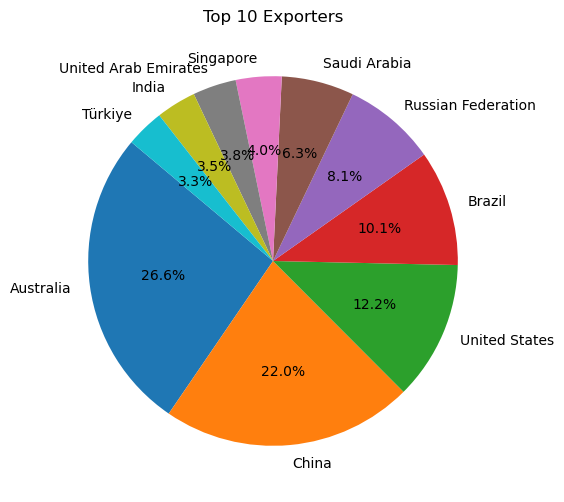

In [18]:
# pie chart of the top 10 exporters

top_exporters = data.groupby('country')['export'].sum().sort_values(ascending=False).head(10)
fig, ax = plt.subplots(figsize=(10, 6))
ax.pie(top_exporters.values, labels=top_exporters.index, autopct='%1.1f%%', startangle=140)
ax.set_title('Top 10 Exporters')
plt.show()

In [64]:
import seaborn as sns

In [45]:
print(groupby_country)

country
Albania           1.779290e+05
Algeria           2.223207e+07
American Samoa    2.828348e+04
Angola            3.239163e+06
Anguilla          8.831549e+03
                      ...     
Uruguay           7.348610e+06
Vanuatu           2.814984e+04
Venezuela         7.220968e+06
Vietnam           3.819572e+07
Yemen             2.377962e+05
Name: export, Length: 180, dtype: float64


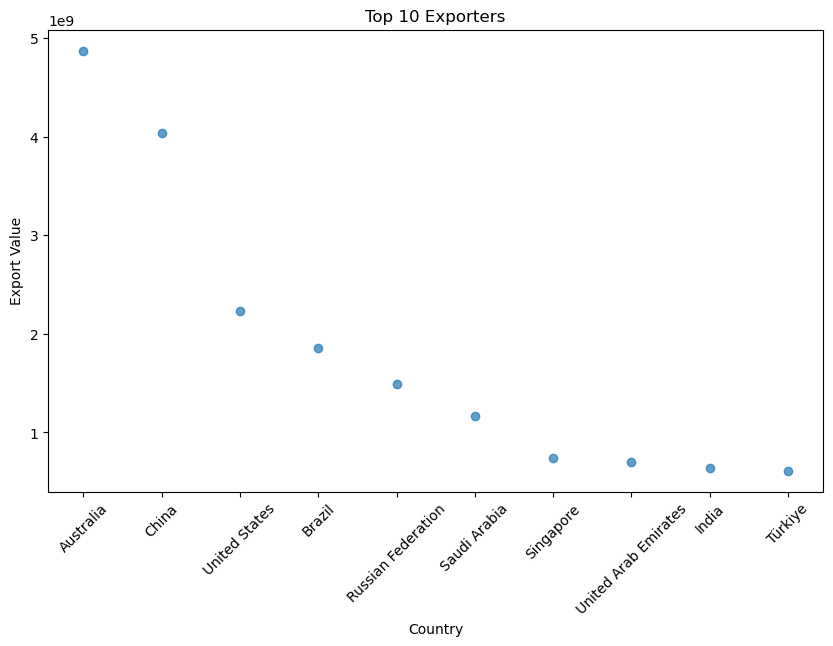

In [19]:
# Scatterplot of the top 10 exporters
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(top_exporters.index, top_exporters.values, alpha=0.7)
ax.set_xlabel('Country')
ax.set_ylabel('Export Value')
ax.set_title('Top 10 Exporters')
plt.xticks(rotation=45)
plt.show()

Once the library is loaded, the polyplot() function can be used to draw a map of the geospatial data frame. The polyplot() function is used to plot polygons, i.e any type of geographic area.

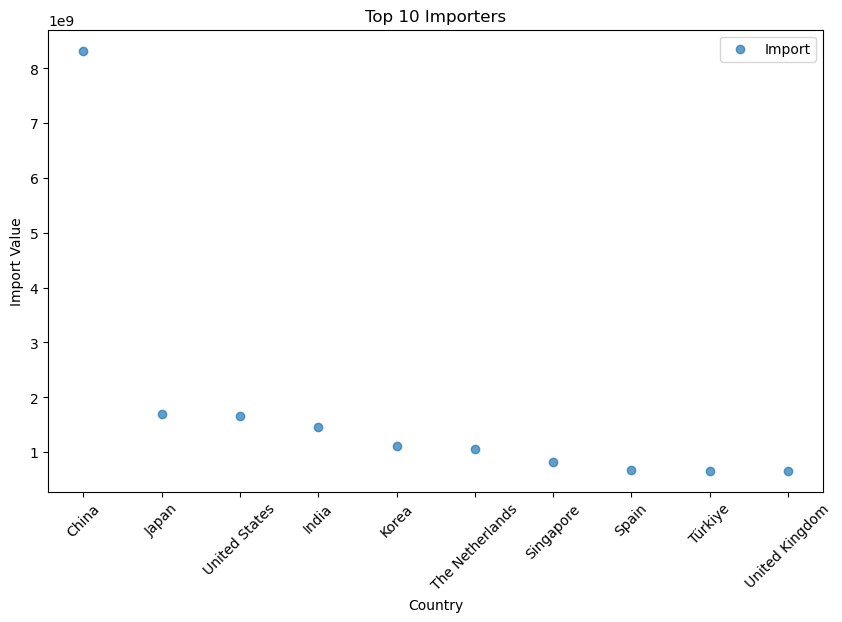

In [32]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(top_importers.index, top_importers.values, alpha=0.7)
ax.set_xlabel('Country')
ax.set_ylabel('Import Value')
ax.set_title('Top 10 Importers')
plt.xticks(rotation=45)
ax.legend(['Import'])
plt.show()

In [ ]:

# C dropdown for selecting country and portname
from dash import dash


app.layout = dbc.Container([
    dbc.Row([
        dbc.Col(html.H1("Key Performance Indicators"), className="mb-2")
    ]),
    dbc.Row([
        dbc.Col(dbc.Card([
            dbc.CardBody([
                html.H4("Total Port Calls", className="card-title"),
                html.P(id="total-port-calls", className="card-text")
            ])
        ], color="primary", inverse=True), width=4),
        dbc.Col(dbc.Card([
            dbc.CardBody([
                html.H4("Total Imports", className="card-title"),
                html.P(id="total-imports", className="card-text")
            ])
        ], color="success", inverse=True), width=4),
        dbc.Col(dbc.Card([
            dbc.CardBody([
                html.H4("Total Exports", className="card-title"),
                html.P(id="total-exports", className="card-text")
            ])
        ], color="info", inverse=True), width=4)
    ]),
    dbc.Row([
        dbc.Col(dcc.Dropdown(
            id='country-dropdown',
            options=[{'label': country, 'value': country} for country in data['country'].unique()],
            placeholder="Select a country"
        ), width=6),
        dbc.Col(dcc.Dropdown(
            id='portname-dropdown',
            placeholder="Select a port"
        ), width=6)
    ]),
    dbc.Row([
        dbc.Col(dcc.Graph(id='kpi-bar-chart'), width=12)
    ])
], fluid=True)

@app.callback(
    [dash.dependencies.Output('portname-dropdown', 'options'),
     dash.dependencies.Output('portname-dropdown', 'value')],
    [dash.dependencies.Input('country-dropdown', 'value')]
)
def set_port_options(selected_country):
    if selected_country is None:
        return [], None
    filtered_ports = data[data['country'] == selected_country]['portname'].unique()
    return [{'label': port, 'value': port} for port in filtered_ports], None

@app.callback(
    [dash.dependencies.Output('total-port-calls', 'children'),
     dash.dependencies.Output('total-imports', 'children'),
     dash.dependencies.Output('total-exports', 'children'),
     dash.dependencies.Output('kpi-bar-chart', 'figure')],
    [dash.dependencies.Input('country-dropdown', 'value'),
     dash.dependencies.Input('portname-dropdown', 'value')]
)
def update_kpis(selected_country, selected_port):
    filtered_data = data
    if selected_country:
        filtered_data = filtered_data[filtered_data['country'] == selected_country]
    if selected_port:
        filtered_data = filtered_data[filtered_data['portname'] == selected_port]

    total_port_calls = filtered_data['portcalls'].sum()
    total_imports = filtered_data['import'].sum()
    total_exports = filtered_data['export'].sum()

    kpis = {
        'Total Port Calls': total_port_calls,
        'Total Imports': total_imports,
        'Total Exports': total_exports
    }

    figure = px.bar(
        x=list(kpis.keys()),
        y=list(kpis.values()),
        labels={'x': 'KPI', 'y': 'Value'},
        title="Key Performance Indicators"
    )

    return f"{total_port_calls:,}", f"{total_imports:,.2f}", f"{total_exports:,.2f}", figure

if __name__ == '__main__':
    app.run_server(debug=True, port=8060)

AttributeError: module 'dash.dash' has no attribute 'dependencies'

In [20]:
gplt.polyplot(data, projection=gcrs.AlbersEqualArea(), figsize=(12, 8))
gplt.cartogram(data, scale='population', projection=gcrs.AlbersEqualArea(), figsize=(12, 8))
gplt.choropleth(data, hue='population', projection=gcrs.AlbersEqualArea(), cmap='Greens', figsize=(12, 8))

NameError: name 'gplt' is not defined

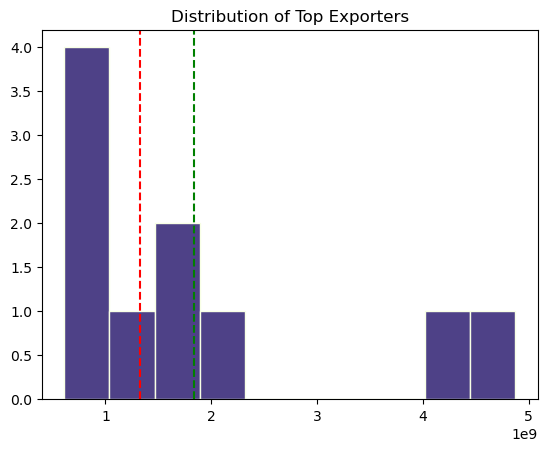

In [27]:
#  histogram of the top exporters
plt.hist(top_exporters, color = '#4e4187', edgecolor = '#f8ffe5',bins = 10)
plt.axvline(top_exporters.mean(), color = 'g', linestyle = 'dashed')
plt.axvline(top_exporters.median(), color = 'r', linestyle = 'dashed')
plt.title('Distribution of Top Exporters')
plt.show()

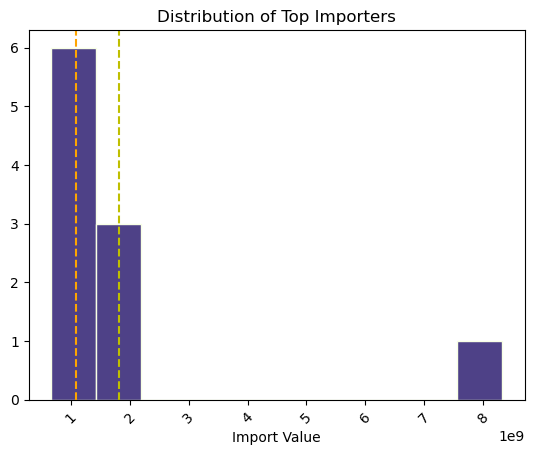

In [28]:
# histogram of the top importers
top_importers = data.groupby('country')['import'].sum().sort_values(ascending=False).head(10)
plt.hist(top_importers, color = '#4e4187', edgecolor = '#f8ffe5', bins = 10)
plt.axvline(top_importers.mean(), color = 'y', linestyle = 'dashed')
plt.axvline(top_importers.median(), color = 'orange', linestyle = 'dashed')
plt.xlabel('Import Value')
plt.xticks(rotation=45)
plt.title('Distribution of Top Importers')
plt.show()

In [ ]:
# Interactive map using Folium
#im = folium.Map(location = [36.16, -86.78], zoom_start = 12, tiles = 'Stamen Terrain')
im 

NameError: name 'fm' is not defined

Add several markers